In [37]:
import pandas as pd
import numpy as np
from pylab import mpl, plt

In [3]:
raw = pd.read_csv('https://hilpisch.com/pyalgo_eikon_eod_data.csv',index_col=0,parse_dates=True).dropna()

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [13]:
raw.to_csv('raw.csv')

In [4]:
data = pd.DataFrame(raw['EUR='])

In [5]:
data.rename(columns={'EUR=': 'price'}, inplace=True)

In [6]:
data['SMA1'] = data['price'].rolling(42).mean()
data['SMA2'] = data['price'].rolling(252).mean()

In [7]:
data.tail()

,price,SMA1,SMA2
Date,,,
2019-12-24,1.1087,1.107698,1.119630
2019-12-26,1.1096,1.107740,1.119529
2019-12-27,1.1175,1.107924,1.119428
2019-12-30,1.1197,1.108131,1.119333
2019-12-31,1.1210,1.108279,1.119231


In [8]:
%matplotlib inline
from pylab import mpl, plt

/tmp/ipykernel_977/3223504035.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<AxesSubplot: title={'center': 'EUR/USD | 42 & 252 days SMAs'}, xlabel='Date'>

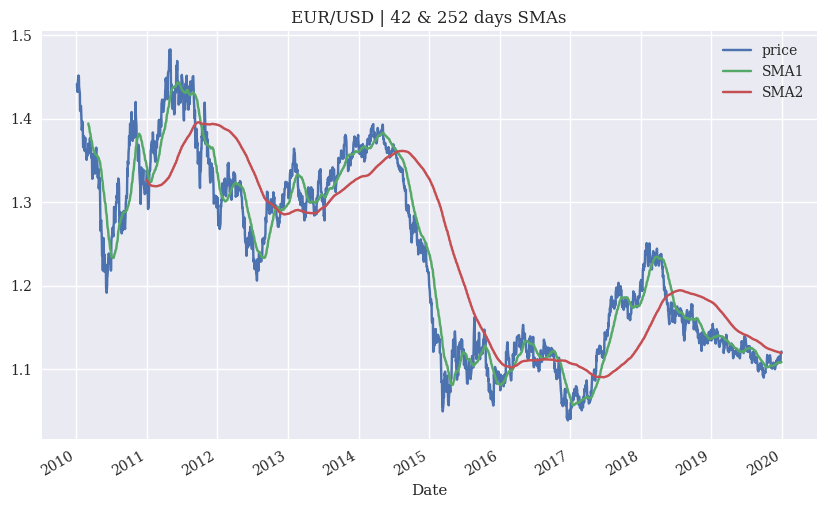

In [9]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
data.plot(title='EUR/USD | 42 & 252 days SMAs', figsize=(10,6))

In [10]:
data['position'] = np.where(data['SMA1'] > data['SMA2'],1,-1)

In [11]:
data.dropna(inplace=True)

<AxesSubplot: title={'center': 'Market Positioning'}, xlabel='Date'>

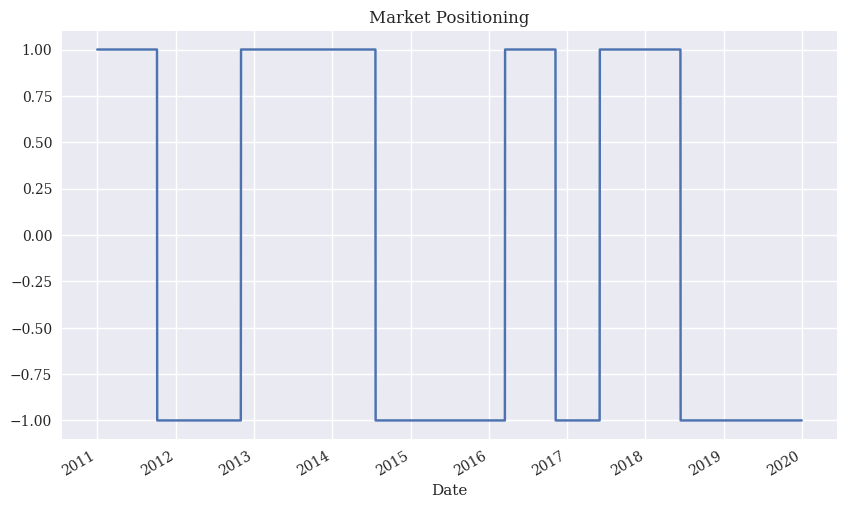

In [12]:
data['position'].plot(ylim=[-1.1,1.1],title='Market Positioning', figsize=(10,6))

In [13]:
data['returns'] = np.log(data['price']/data['price'].shift(1))

<AxesSubplot: >

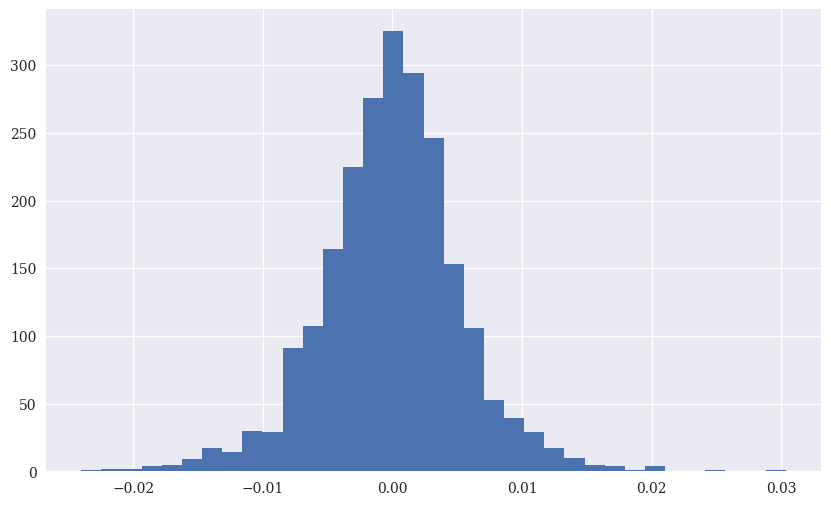

In [14]:
data['returns'].hist(bins=35, figsize=(10,6))

In [15]:
data['strategy'] = data['position'].shift(1) * data['returns']

In [16]:
data[['returns','strategy']].sum() 

returns    -0.176731
strategy    0.253121
dtype: float64

In [17]:
data[['returns','strategy']].sum().8(np.exp)

returns     0.838006
strategy    1.288039
dtype: float64

<AxesSubplot: xlabel='Date'>

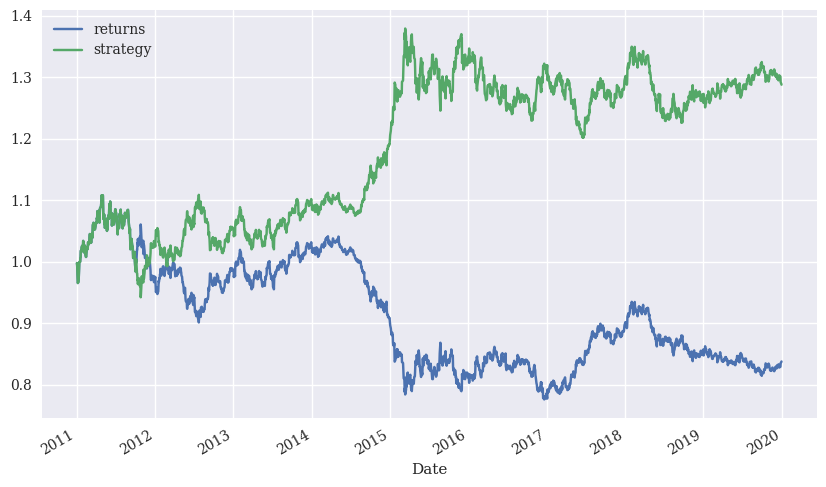

In [18]:
data[['returns','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [4]:
import SMAVectorBacktester as SMA

In [5]:
smabt = SMA.SMAVectorBacktester('EUR=',42,252,'2010-1-1','2019-12-31')

In [6]:
smabt.run_strategy()

(1.29, 0.45)

In [7]:
%%time
smabt.optimize_parameters((30, 50, 2), (200, 300, 2))

CPU times: user 2.45 s, sys: 0 ns, total: 2.45 s
Wall time: 2.44 s


(array([ 48., 238.]), 1.5)

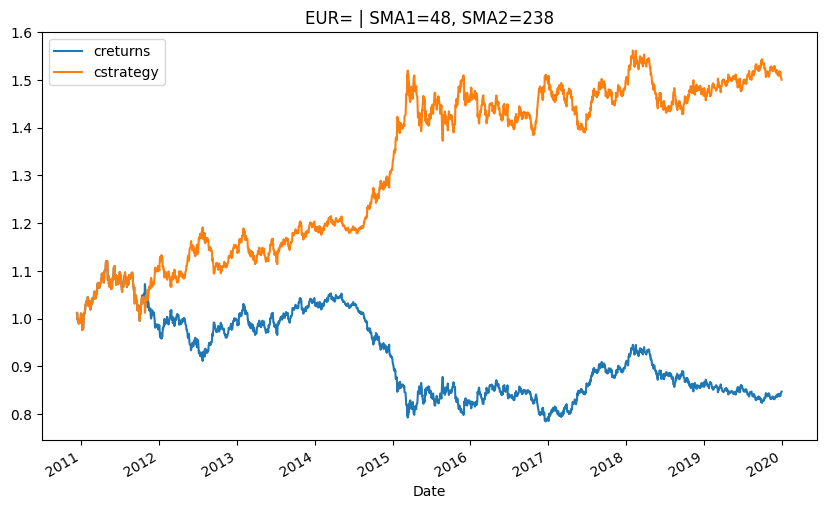

In [8]:
smabt.plot_results()

In [5]:
# モメンタム戦略
data = pd.DataFrame(raw['XAU='])

In [6]:
data.rename(columns={'XAU=': 'price'}, inplace=True)

In [7]:
data['returns'] = np.log(data['price']/data['price'].shift(1))

In [8]:
data['position'] = np.sign(data['returns'])

In [9]:
data['strategy'] = data['position'].shift(1) * data['returns']

<AxesSubplot: xlabel='Date'>

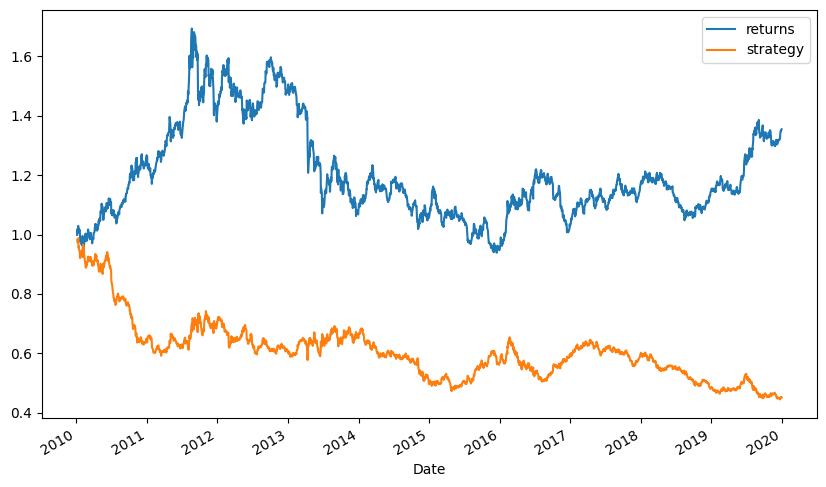

In [10]:
data[['returns','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [11]:
data['position'] = np.sign(data['returns'].rolling(3).mean())

In [12]:
data['strategy'] = data['position'].shift(1) * data['returns']

<AxesSubplot: xlabel='Date'>

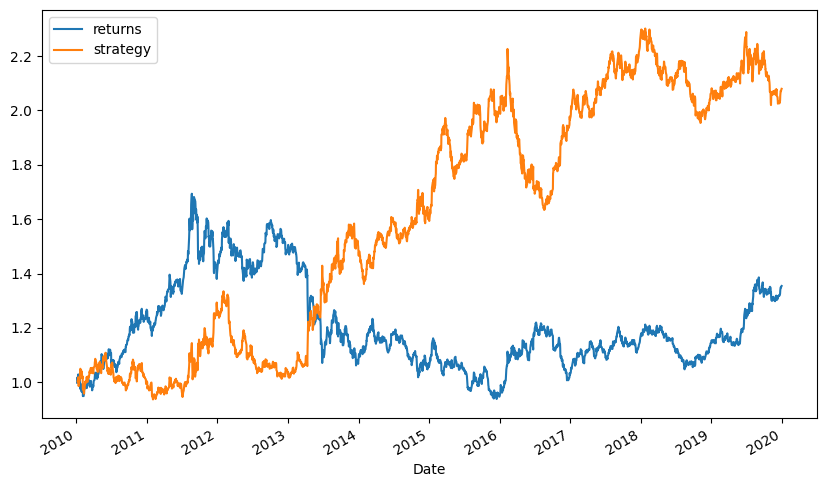

In [13]:
data[['returns','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [14]:
data = pd.read_csv('./data/AAPL_1min_05052020.csv',index_col=0,parse_dates=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2020-05-05 16:00:00 to 2020-05-05 20:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HIGH    241 non-null    float64
 1   LOW     241 non-null    float64
 2   OPEN    241 non-null    float64
 3   CLOSE   241 non-null    float64
 4   COUNT   241 non-null    float64
 5   VOLUME  241 non-null    float64
dtypes: float64(6)
memory usage: 13.2 KB


In [16]:
data['returns'] = np.log(data['CLOSE']/data['CLOSE'].shift(1))

In [17]:
to_plot = ['returns']

In [18]:
for m in [1,3,5,7,9]:
    data[f'position_{m}'] = np.sign(data['returns'].rolling(m).mean())
    data[f'strategy_{m}'] = data[f'position_{m}'].shift(1) * data['returns']
    to_plot.append(f'strategy_{m}')

<AxesSubplot: title={'center': 'AAPL'}, xlabel='Date'>

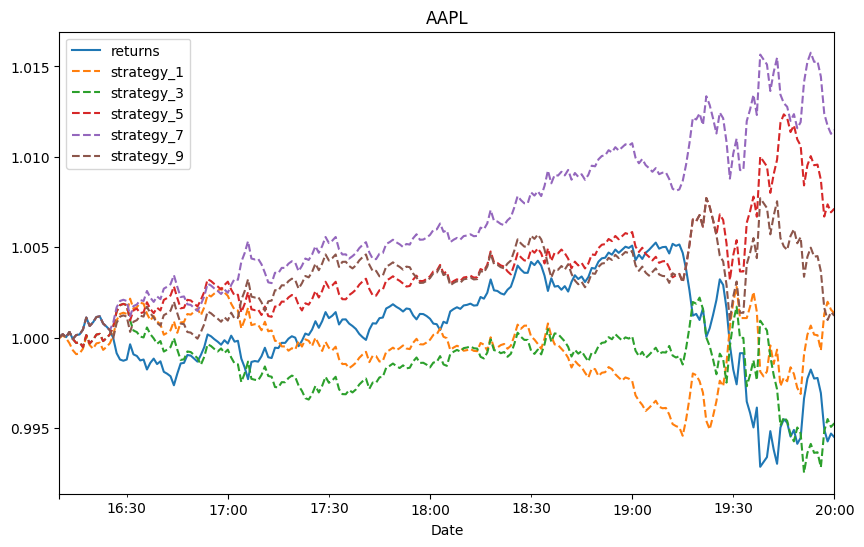

In [19]:
data[to_plot].dropna().cumsum().apply(np.exp).plot(title='AAPL',figsize=(10,6),style=['-','--','--','--','--','--'])

In [20]:
import MomVectorBacktester as Mom

In [21]:
mombt = Mom.MomVectorBacktester('XAU=','2010-1-1','2019-12-31',1000,0.0)

In [22]:
mombt.run_strategy(momentum=3)

(2079.79, 739.55)

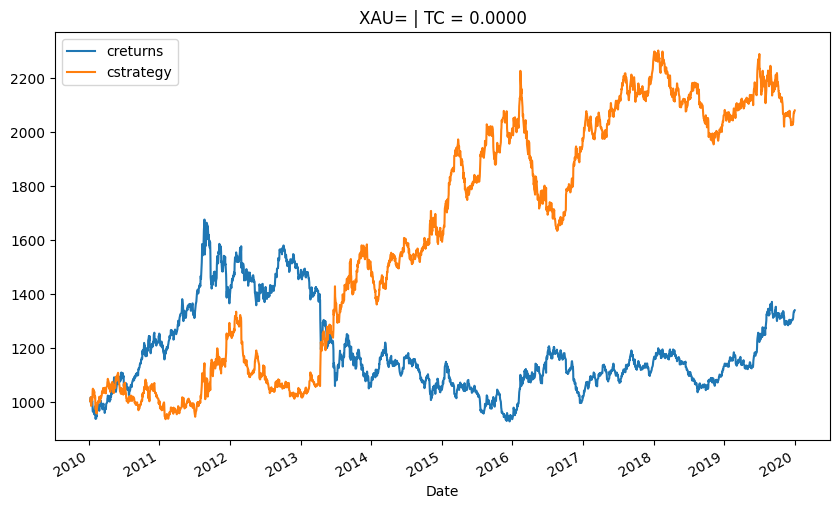

In [23]:
mombt.plot_results()

In [26]:
mombt = Mom.MomVectorBacktester('XAU=','2010-1-1','2019-12-31',10000,0.001)

In [27]:
mombt.run_strategy(momentum=3)

(10749.4, -2652.93)

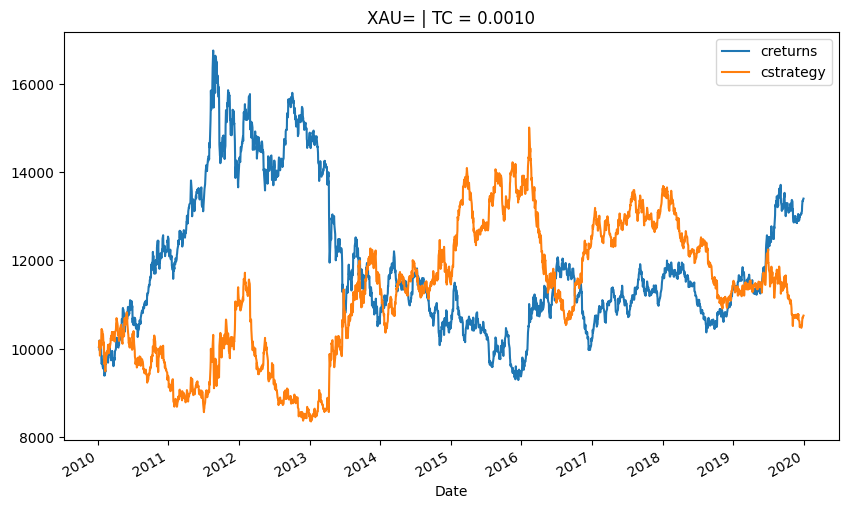

In [28]:
mombt.plot_results()

In [29]:
# 平均回帰戦略
data = pd.DataFrame(raw['GDX'])

In [30]:
data.rename(columns={'GDX': 'price'}, inplace=True)

In [31]:
data['returns'] = np.log(data['price']/data['price'].shift(1))

In [32]:
SMA = 25

In [33]:
data['SMA'] = data['price'].rolling(SMA).mean()

In [34]:
threshold = 3.5

In [35]:
data['distance'] = data['price'] - data['SMA']

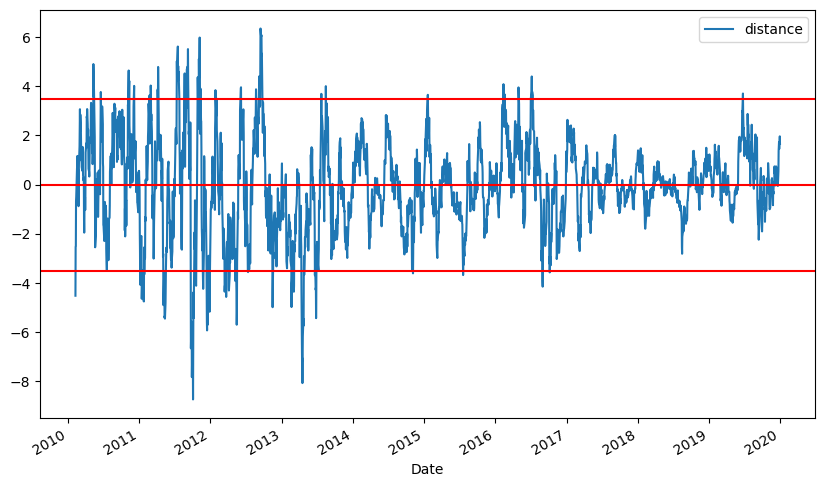

In [41]:
data['distance'].dropna().plot(figsize=(10,6), legend=True)
plt.axhline(threshold,color='r')
plt.axhline(-threshold,color='r')
plt.axhline(0,color='r')

In [61]:
# data['position'] = np.where(data['distance'] > threshold, -1, np.nan)

data['position'] = np.where(data['distance'] > threshold,-1, np.nan)

In [62]:
# data['position'] = np.where(data['distance'] < threshold, 1, data['position'])
data['position'] = np.where(data['distance'] < -threshold,
                            1, data['position'])

In [63]:
# data['position'] = np.where(data['distance'] * data['distance'].shift(1) < 0,  0, data['position'])

data['position'] = np.where(data['distance'] *
            data['distance'].shift(1) < 0, 0, data['position'])

In [64]:
# data['position'] = data['position'].ffill().fillna(0)
data['position'] = data['position'].ffill().fillna(0)

<AxesSubplot: xlabel='Date'>

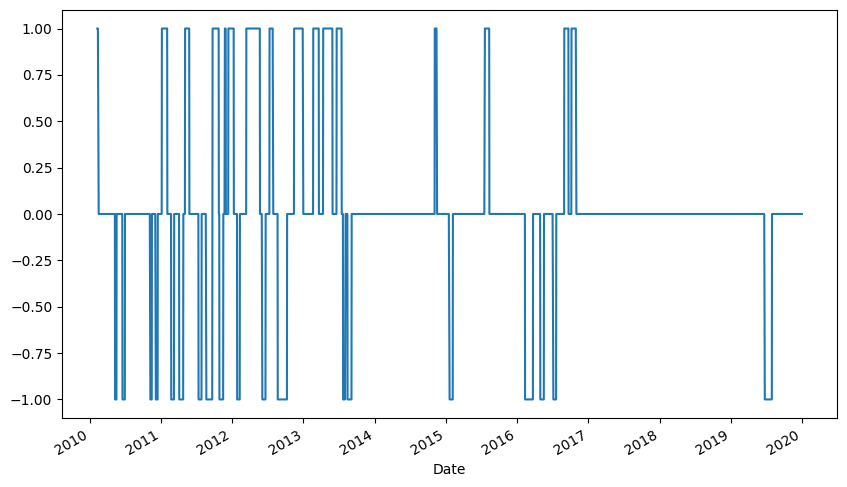

In [65]:
data['position'].iloc[SMA:].plot(ylim=[-1.1,1.1],figsize=(10,6))

In [66]:
data['strategy'] = data['position'].shift(1) * data['returns']

<AxesSubplot: xlabel='Date'>

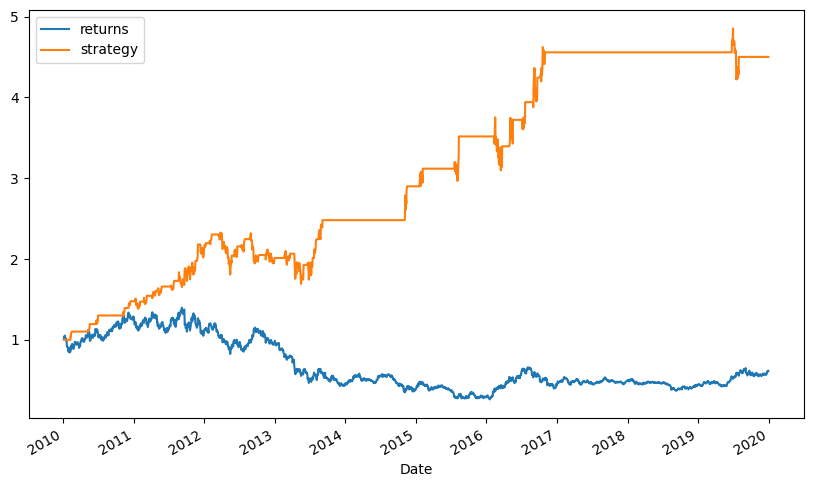

In [67]:
data[['returns','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [68]:
import MRVectorBacktester as MR

In [69]:
mrbt = MR.MRVectorBacktester('GLD','2010-1-1','2019-12-31',10000,0.001)

In [70]:
mrbt.run_strategy(SMA=43,threshold=7.5)

(13542.15, 646.21)

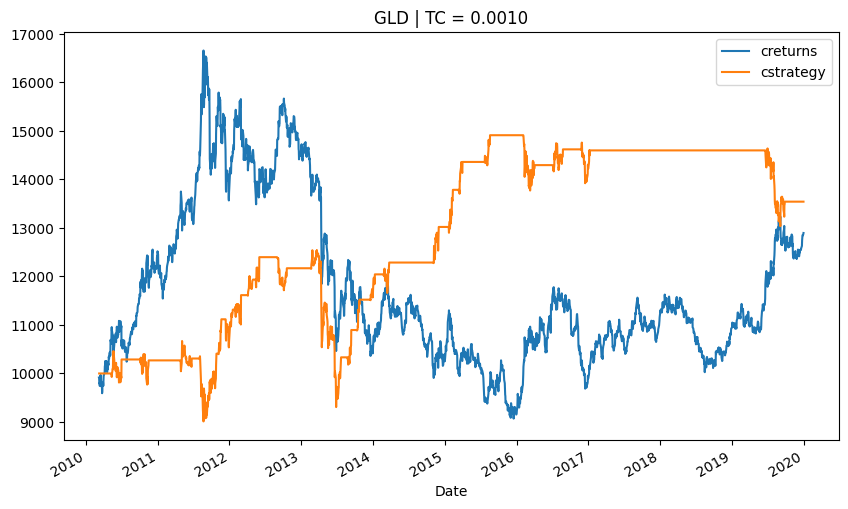

In [71]:
mrbt.plot_results()